<a href="https://colab.research.google.com/github/nithin-grk/ETL-and-Visualization-of-Worldwide-Airline-Data/blob/main/ETL_and_Visualization_of_Worldwide_Airline_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import pandas
import dask
import folium

In [ ]:
!wget https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat     #Airport Dataset
!wget https://raw.githubusercontent.com/jpatokal/openflights/master/data/airlines.dat     #Airlines Dataset
!wget https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat       #Routes Dataset
!wget https://raw.githubusercontent.com/jpatokal/openflights/master/data/planes.dat       #Planes Dataset
!wget https://raw.githubusercontent.com/jpatokal/openflights/master/data/countries.dat    #Countries Dataset

--2025-01-12 00:16:37--  https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127225 (1.1M) [text/plain]
Saving to: ‘airports.dat’

airports.dat        100%[===================>]   1.07M  --.-KB/s    in 0.06s   

2025-01-12 00:16:37 (17.9 MB/s) - ‘airports.dat’ saved [1127225/1127225]

--2025-01-12 00:16:37--  https://raw.githubusercontent.com/jpatokal/openflights/master/data/airlines.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396896 (388K) [text/

In [ ]:
# Reading the datasets
import pandas as pd
Airports_data = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat", header = None)
Airlines_data = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airlines.dat", header = None)
Routes_data = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat", header = None)
Planes_data = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/planes.dat", header = None)
Countries_data = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/countries.dat", header = None)

# Renaming Columns
Airports_data.columns = ["Airport ID", "Airport Name", "City", "Country", "IATA/FAA", "ICAO",
 "Latitude", "Longitude", "Altitude", "Timezone", "DST",
 "Tz Database Time Zone", "Type", "Source"]

Airlines_data.columns = ["Airline ID", "Name", "Alias", "IATA Code", "ICAO Code", "Call Sign", "Country", "Active"]

Routes_data.columns = ["Airline", "Airline ID", "Departure Airport", "Departure Airport ID", "Arrival Airport", "Arrival Airport ID", "Codeshare", "Stops", "Equipment"]

Planes_data.columns = ["Name", "IATA Code", "ICAO Code"]

Countries_data.columns = ["Country", "Two-letter Code", "Alternative Code"]

#Filter Rows With Missing Values
Airports_data = Airports_data.dropna()
Airlines_data = Airlines_data.dropna()
Routes_data = Routes_data.dropna()
Planes_data = Planes_data.dropna()
Countries_data = Countries_data.dropna()

thresold_altitude = 1000
#Filtered_Airports_data = Airports_data[Airports_data['Altitude'] > thresold_altitude]
#Filtered_Airlines_data = Airlines_data[Airlines_data['column_name'] > threshold]
#Filtered_Routes_data = Routes_data[Routes_data['column_name'] > threshold]
#Filtered_Planes_data = Planes_data[Planes_data['column_name'] > threshold]
#Filtered_Countries_data = Countries_data[Countries_data['column_name'] > threshold]


Airports_data

,Airport ID,Airport Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz Database Time Zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [ ]:
Airlines_data

,Airline ID,Name,Alias,IATA Code,ICAO Code,Call Sign,Country,Active
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
10,10,40-Mile Air,\N,Q5,MLA,MILE-AIR,United States,Y
13,13,Ansett Australia,\N,AN,AAA,ANSETT,Australia,Y
15,15,Abelag Aviation,\N,W9,AAB,ABG,Belgium,N
21,21,Aigle Azur,\N,ZI,AAF,AIGLE AZUR,France,Y
...,...,...,...,...,...,...,...,...
6063,19974,SOCHI AIR EXPRESS,ADLER EXPRESS,Q4,SAE,ADLER EXPRESS,Russia,Y
6096,20285,WestJet Encore,Encore,WR,WEN,Encore,Canada,Y
6125,20752,ATA Airlines (Iran),هواپیمایی آتا,I3,\N,ATALAR,Iran,Y
6153,21131,All America BOPY,All America BOPY,0P,PYB,BOPY,Paraguay,Y


In [ ]:
Routes_data

,Airline,Airline ID,Departure Airport,Departure Airport ID,Arrival Airport,Arrival Airport ID,Codeshare,Stops,Equipment
187,2P,897,GES,2402,MNL,2397,Y,0,320
197,2P,897,MNL,2397,GES,2402,Y,0,320
1059,4M,3201,DFW,3670,EZE,3988,Y,0,777
1060,4M,3201,EZE,3988,DFW,3670,Y,0,777
1061,4M,3201,EZE,3988,JFK,3797,Y,0,777
...,...,...,...,...,...,...,...,...,...
67429,ZH,4611,ZHA,6357,PEK,3364,Y,0,737
67431,ZH,4611,ZUH,6355,CKG,3393,Y,0,737
67432,ZH,4611,ZUH,6355,CTU,3395,Y,0,319
67436,ZH,4611,ZUH,6355,PEK,3364,Y,0,737 320


In [ ]:
Planes_data

,Name,IATA Code,ICAO Code
0,Aerospatiale (Nord) 262,ND2,N262
1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,Aerospatiale SN.601 Corvette,NDC,S601
3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,Aerospatiale/Alenia ATR 42-500,AT5,AT45
...,...,...,...
241,Tupolev Tu-144,\N,T144
242,Tupolev Tu-154,TU5,T154
243,Tupolev Tu-204,T20,T204
244,Yakovlev Yak-40,YK4,YK40


In [ ]:
Countries_data

,Country,Two-letter Code,Alternative Code
1,Aruba,AW,AA
2,Antigua and Barbuda,AG,AC
3,United Arab Emirates,AE,AE
4,Afghanistan,AF,AF
5,Algeria,DZ,AG
...,...,...,...
256,Samoa,WS,WS
257,Eswatini,SZ,WZ
258,Yemen,YE,YM
259,Zambia,ZM,ZA


Next Tasks :-
1. We need to handle missing data.
This has already been achieved by .dropna()
2. Enrich the Routes Data. Add more details to the Routess_data Dataset.

Merge Routes_data with Airport_data:
Add source and destination details.

Merge with Routes_data with Airlines_data:
Add airline details to each route.



In [ ]:
Routes_with_airports = Routes_data.merge(
    Airports_data, left_on="Departure Airport", right_on="IATA/FAA", how="left"
).merge(
    Airports_data, left_on="Arrival Airport", right_on="IATA/FAA", how="left", suffixes=("_source", "_destination")
)
Routes_with_airports


,Airline,Airline ID,Departure Airport,Departure Airport ID,Arrival Airport,Arrival Airport ID,Codeshare,Stops,Equipment,Airport ID_source,...,IATA/FAA_destination,ICAO_destination,Latitude_destination,Longitude_destination,Altitude_destination,Timezone_destination,DST_destination,Tz Database Time Zone_destination,Type_destination,Source_destination
0,2P,897,GES,2402,MNL,2397,Y,0,320,2402.0,...,MNL,RPLL,14.508600,121.019997,75.0,8,N,Asia/Manila,airport,OurAirports
1,2P,897,MNL,2397,GES,2402,Y,0,320,2397.0,...,GES,RPMR,6.058000,125.096001,505.0,8,N,Asia/Manila,airport,OurAirports
2,4M,3201,DFW,3670,EZE,3988,Y,0,777,3670.0,...,EZE,SAEZ,-34.822200,-58.535800,67.0,-3,N,America/Buenos_Aires,airport,OurAirports
3,4M,3201,EZE,3988,DFW,3670,Y,0,777,3988.0,...,DFW,KDFW,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports
4,4M,3201,EZE,3988,JFK,3797,Y,0,777,3988.0,...,JFK,KJFK,40.639801,-73.778900,13.0,-5,A,America/New_York,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14592,ZH,4611,ZHA,6357,PEK,3364,Y,0,737,6357.0,...,PEK,ZBAA,40.080101,116.584999,116.0,8,U,Asia/Shanghai,airport,OurAirports
14593,ZH,4611,ZUH,6355,CKG,3393,Y,0,737,6355.0,...,CKG,ZUCK,29.719200,106.641998,1365.0,8,U,Asia/Shanghai,airport,OurAirports
14594,ZH,4611,ZUH,6355,CTU,3395,Y,0,319,6355.0,...,CTU,ZUUU,30.578501,103.946999,1625.0,8,U,Asia/Shanghai,airport,OurAirports
14595,ZH,4611,ZUH,6355,PEK,3364,Y,0,737 320,6355.0,...,PEK,ZBAA,40.080101,116.584999,116.0,8,U,Asia/Shanghai,airport,OurAirports


In [ ]:
Airlines_data["Airline ID"] = Airlines_data["Airline ID"].astype(str)
Routes_with_details = Routes_with_airports.merge(
    Airlines_data, left_on="Airline", right_on="Airline ID", how="left"
)
Routes_with_details

,Airline,Airline ID_x,Departure Airport,Departure Airport ID,Arrival Airport,Arrival Airport ID,Codeshare,Stops,Equipment,Airport ID_source,...,Type_destination,Source_destination,Airline ID_y,Name,Alias,IATA Code,ICAO Code,Call Sign,Country,Active
0,2P,897,GES,2402,MNL,2397,Y,0,320,2402.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2P,897,MNL,2397,GES,2402,Y,0,320,2397.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4M,3201,DFW,3670,EZE,3988,Y,0,777,3670.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4M,3201,EZE,3988,DFW,3670,Y,0,777,3988.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4M,3201,EZE,3988,JFK,3797,Y,0,777,3988.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14592,ZH,4611,ZHA,6357,PEK,3364,Y,0,737,6357.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14593,ZH,4611,ZUH,6355,CKG,3393,Y,0,737,6355.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14594,ZH,4611,ZUH,6355,CTU,3395,Y,0,319,6355.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14595,ZH,4611,ZUH,6355,PEK,3364,Y,0,737 320,6355.0,...,airport,OurAirports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Store Cleaned and Enriched Data

Save the enriched datasets for later analysis:

In [ ]:
Routes_with_details.to_csv("Enriched_Routes.csv", index=False)
Airports_data.to_csv("Cleaned_Airports.csv", index=False)
Airlines_data.to_csv("Cleaned_Airlines.csv", index=False)


Analyzation of the enriched data:-

Now that the data is cleaned and enriched, let's perform simple analysis to extract insights.

Example 1: Top 10 Busiest Airports.
Count the number of routes(departures) for each airport:

Departure Airport
ATL    633
ORD    277
LAX    209
LHR    203
VIE    159
CDG    155
FRA    150
AMS    145
DFW    143
DEN    136
Name: count, dtype: int64


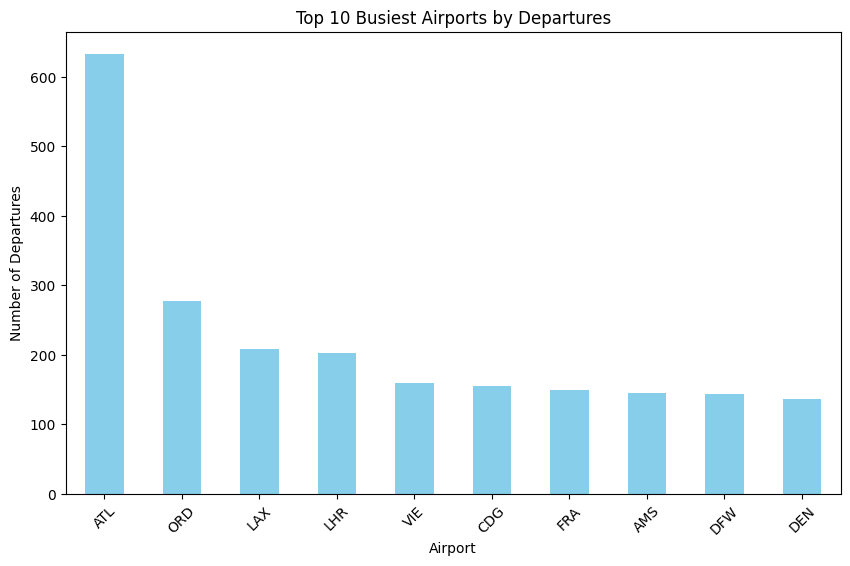

In [ ]:
busiest_airports = Routes_with_airports['Departure Airport'].value_counts().head(10)
print(busiest_airports)

import matplotlib.pyplot as plt

busiest_airports.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Top 10 Busiest Airports by Departures")
plt.xlabel("Airport")
plt.ylabel("Number of Departures")
plt.xticks(rotation=45)
plt.show()

Example 2: Top 10 airlines by Routes

Count the number of routes for each airline:

In [ ]:
frequent_routes = Routes_with_airports.groupby(
    ["Departure Airport", "Arrival Airport"]
).size().sort_values(ascending=False)
frequent_routes.head(10)




,,0
Departure Airport,Arrival Airport,
ORD,ATL,19
ATL,ORD,18
ORD,MSY,12
HKT,BKK,10
ATL,MIA,10
MIA,ATL,10
MSY,JFK,9
CNX,BKK,9
JFK,MSY,9


Example 3: Country Level Insights

Analyze the number of airports in each country


In [57]:
airports_by_country = Airports_data["Country"].value_counts().head(20)
print("Top 10 Countries by Number of Airports:")
airports_by_country


Top 10 Countries by Number of Airports:


,count
Country,
United States,1512
Canada,430
Australia,304
Brazil,264
Russia,262
Germany,249
China,240
France,217
United Kingdom,167


Example 4: Top Equipments used on routes.

Analyze the most common equipment (plane types) used:

In [ ]:
top_equipment = Routes_with_airports["Equipment"].value_counts().head(10)
print("10 most used equipments:")
top_equipment


10 most used equipments:


,count
Equipment,
320,1126
CRJ,776
737,703
738,658
73W,423
ERJ,360
319,345
AT7,314
DH4,305


Example 5:
Active vs. Inactive Airlines

Analyze the distribution of active and inactive airlines.


In [ ]:
active_airlines = Airlines_data["Active"].value_counts().head(10)
print("Active vs Inactive Airlines:")
active_airlines


Active vs Inactive Airlines:


,count
Active,
Y,661
N,348
n,1


In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


Routes_with_airports["Distance (km)"] = Routes_with_airports.apply(
    lambda row: haversine(
        row["Latitude_source"], row["Longitude_source"],
        row["Latitude_destination"], row["Longitude_destination"]
    ), axis=1
)


# Sort by distance
longest_routes = Routes_with_airports.sort_values(by="Distance (km)", ascending=False).head(10)

# Extract necessary columns
longest_routes = longest_routes[
    ["Departure Airport", "Arrival Airport",
     "Latitude_source", "Longitude_source",
     "Latitude_destination", "Longitude_destination", "Distance (km)"]
]

longest_routes



,Departure Airport,Arrival Airport,Latitude_source,Longitude_source,Latitude_destination,Longitude_destination,Distance (km)
1395,SYD,DFW,-33.946098,151.177002,32.896801,-97.038002,13808.178254
616,DFW,BNE,32.896801,-97.038002,-27.384199,153.117004,13364.854652
820,JFK,HKG,40.639801,-73.778900,22.308901,113.915001,12970.381056
773,HKG,JFK,22.308901,113.915001,40.639801,-73.778900,12970.381056
713,EWR,HKG,40.692501,-74.168701,22.308901,113.915001,12959.911725
772,HKG,EWR,22.308901,113.915001,40.692501,-74.168701,12959.911725
12511,JFK,JNB,40.639801,-73.778900,-26.139200,28.246000,12831.326650
12522,JNB,JFK,-26.139200,28.246000,40.639801,-73.778900,12831.326650
1027,MEL,LAX,-37.673302,144.843002,33.942501,-118.407997,12757.896954
5508,LAX,MEL,33.942501,-118.407997,-37.673302,144.843002,12757.896954


In [ ]:
import folium

# Initialize map at an approximate central location
m = folium.Map(location=[0, 0], zoom_start=2)


In [ ]:
# Plot each route
for _, row in longest_routes.iterrows():
    source = [row["Latitude_source"], row["Longitude_source"]]
    destination = [row["Latitude_destination"], row["Longitude_destination"]]

    # Add a line connecting the source and destination
    folium.PolyLine(
        locations=[source, destination],
        color="blue",
        weight=2.5,
        tooltip=f"{row['Departure Airport']} → {row['Arrival Airport']} ({row['Distance (km)']:.2f} km)"
    ).add_to(m)


In [ ]:
for _, row in longest_routes.iterrows():
    folium.Marker(
        location=[row["Latitude_source"], row["Longitude_source"]],
        popup=f"Source: {row['Departure Airport']}",
        icon=folium.Icon(color="green")
    ).add_to(m)

    folium.Marker(
        location=[row["Latitude_destination"], row["Longitude_destination"]],
        popup=f"Destination: {row['Arrival Airport']}",
        icon=folium.Icon(color="red")
    ).add_to(m)


In [ ]:
from IPython.display import display

# Display the map
display(m)



Creating a Dashboard

In [ ]:
!pip install streamlit
!pip install streamlit_folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from streamlit_folium import st_folium
import matplotlib.pyplot as plt

CREATION OF A DASHBOARD

Loading Your Data:-

Load the cleaned and enriched datasets (e.g., Routes_with_airports, Airports_data):

In [ ]:
# Load datasets
Airports_data = pd.read_csv("Cleaned_Airports.csv")
Routes_with_airports = pd.read_csv("Enriched_Routes.csv")

# Ensure the necessary columns are present
if "Distance (km)" not in Routes_with_airports.columns:
    st.warning("Distance (km) column not found. Make sure the data is enriched properly.")


2025-01-23 19:54:05.058 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-23 19:54:05.192 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-23 19:54:05.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
